## Work
1. 請建立自己的deep neural network
2. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
3. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras
from keras.models import Model
from keras.datasets import cifar10
from keras import optimizers
# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

2021-11-17 14:12:53.473982: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-17 14:12:53.474022: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
num_classes = 10

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:

# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))



In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(x_train.shape[-1])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
"""
Compile 模型
"""
model = build_mlp()
model.summary()
optimizer = optimizers.gradient_descent_v2.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"],  optimizer=optimizer)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


2021-11-17 14:13:23.019336: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-17 14:13:23.019418: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-17 14:13:23.019473: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (11402.pyspark3): /proc/driver/nvidia/version does not exist
2021-11-17 14:13:23.019719: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

2021-11-17 14:13:39.970134: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.
2021-11-17 14:13:40.167528: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
196/196 [==============================] - 4s 20ms/step - loss: 2.0775 - accuracy: 0.2563 - val_loss: 1.9337 - val_accuracy: 0.3190
Epoch 2/500
196/196 [==============================] - 3s 17ms/step - loss: 1.8778 - accuracy: 0.3417 - val_loss: 1.8369 - val_accuracy: 0.3503
Epoch 3/500
196/196 [==============================] - 3s 17ms/step - loss: 1.8039 - accuracy: 0.3687 - val_loss: 1.7830 - val_accuracy: 0.3734
Epoch 4/500
196/196 [==============================] - 4s 19ms/step - loss: 1.7574 - accuracy: 0.3856 - val_loss: 1.7404 - val_accuracy: 0.3876
Epoch 5/500
196/196 [==============================] - 3s 16ms/step - loss: 1.7194 - accuracy: 0.3980 - val_loss: 1.7016 - val_accuracy: 0.4029
Epoch 6/500
196/196 [==============================] - 3s 16ms/step - loss: 1.6863 - accuracy: 0.4118 - val_loss: 1.6721 - val_accuracy: 0.4150
Epoch 7/500
196/196 [==============================] - 3s 16ms/step - loss: 1.6584 - accuracy: 0.4201 - val_loss: 1.6467 - val_accuracy:

196/196 [==============================] - 3s 16ms/step - loss: 1.0747 - accuracy: 0.6210 - val_loss: 1.3671 - val_accuracy: 0.5179
Epoch 58/500
196/196 [==============================] - 3s 16ms/step - loss: 1.0651 - accuracy: 0.6267 - val_loss: 1.3738 - val_accuracy: 0.5162
Epoch 59/500
196/196 [==============================] - 3s 16ms/step - loss: 1.0575 - accuracy: 0.6269 - val_loss: 1.3377 - val_accuracy: 0.5285
Epoch 60/500
196/196 [==============================] - 3s 15ms/step - loss: 1.0525 - accuracy: 0.6294 - val_loss: 1.4058 - val_accuracy: 0.5088
Epoch 61/500
196/196 [==============================] - 3s 15ms/step - loss: 1.0421 - accuracy: 0.6336 - val_loss: 1.3262 - val_accuracy: 0.5349
Epoch 62/500
196/196 [==============================] - 3s 15ms/step - loss: 1.0322 - accuracy: 0.6381 - val_loss: 1.3929 - val_accuracy: 0.5136
Epoch 63/500
196/196 [==============================] - 3s 15ms/step - loss: 1.0296 - accuracy: 0.6390 - val_loss: 1.3531 - val_accuracy: 0.532

196/196 [==============================] - 3s 15ms/step - loss: 0.6760 - accuracy: 0.7668 - val_loss: 1.6283 - val_accuracy: 0.5069
Epoch 114/500
196/196 [==============================] - 3s 17ms/step - loss: 0.6705 - accuracy: 0.7675 - val_loss: 1.6906 - val_accuracy: 0.4961
Epoch 115/500
196/196 [==============================] - 4s 18ms/step - loss: 0.6690 - accuracy: 0.7678 - val_loss: 1.7219 - val_accuracy: 0.4875
Epoch 116/500
196/196 [==============================] - 3s 17ms/step - loss: 0.6487 - accuracy: 0.7769 - val_loss: 1.6643 - val_accuracy: 0.5077
Epoch 117/500
196/196 [==============================] - 3s 16ms/step - loss: 0.6618 - accuracy: 0.7700 - val_loss: 1.8158 - val_accuracy: 0.4662
Epoch 118/500
196/196 [==============================] - 3s 16ms/step - loss: 0.6588 - accuracy: 0.7712 - val_loss: 1.6423 - val_accuracy: 0.5094
Epoch 119/500
196/196 [==============================] - 3s 16ms/step - loss: 0.6336 - accuracy: 0.7822 - val_loss: 1.6758 - val_accuracy:

196/196 [==============================] - 3s 15ms/step - loss: 0.3502 - accuracy: 0.8871 - val_loss: 2.1569 - val_accuracy: 0.4839
Epoch 170/500
196/196 [==============================] - 3s 15ms/step - loss: 0.3533 - accuracy: 0.8863 - val_loss: 2.1326 - val_accuracy: 0.5061
Epoch 171/500
196/196 [==============================] - 3s 15ms/step - loss: 0.3493 - accuracy: 0.8856 - val_loss: 2.6629 - val_accuracy: 0.4660
Epoch 172/500
196/196 [==============================] - 3s 15ms/step - loss: 0.3614 - accuracy: 0.8836 - val_loss: 2.1215 - val_accuracy: 0.4996
Epoch 173/500
196/196 [==============================] - 3s 15ms/step - loss: 0.3333 - accuracy: 0.8916 - val_loss: 1.9955 - val_accuracy: 0.5226
Epoch 174/500
196/196 [==============================] - 3s 15ms/step - loss: 0.3418 - accuracy: 0.8892 - val_loss: 2.1608 - val_accuracy: 0.4971
Epoch 175/500
196/196 [==============================] - 3s 15ms/step - loss: 0.3451 - accuracy: 0.8897 - val_loss: 2.0525 - val_accuracy:

196/196 [==============================] - 3s 15ms/step - loss: 0.2381 - accuracy: 0.9258 - val_loss: 2.4191 - val_accuracy: 0.5039
Epoch 226/500
196/196 [==============================] - 3s 15ms/step - loss: 0.2175 - accuracy: 0.9349 - val_loss: 2.6491 - val_accuracy: 0.4783
Epoch 227/500
196/196 [==============================] - 3s 16ms/step - loss: 0.2413 - accuracy: 0.9242 - val_loss: 2.2982 - val_accuracy: 0.5181
Epoch 228/500
196/196 [==============================] - 3s 15ms/step - loss: 0.2529 - accuracy: 0.9228 - val_loss: 2.3736 - val_accuracy: 0.5039
Epoch 229/500
196/196 [==============================] - 3s 16ms/step - loss: 0.2253 - accuracy: 0.9297 - val_loss: 2.3497 - val_accuracy: 0.5126
Epoch 230/500
196/196 [==============================] - 3s 17ms/step - loss: 0.2023 - accuracy: 0.9392 - val_loss: 2.3637 - val_accuracy: 0.5136
Epoch 231/500
196/196 [==============================] - 4s 20ms/step - loss: 0.2041 - accuracy: 0.9377 - val_loss: 2.3608 - val_accuracy:

196/196 [==============================] - 3s 15ms/step - loss: 0.3046 - accuracy: 0.8945 - val_loss: 3.1204 - val_accuracy: 0.4657
Epoch 282/500
196/196 [==============================] - 3s 15ms/step - loss: 0.2423 - accuracy: 0.9177 - val_loss: 2.7015 - val_accuracy: 0.5101
Epoch 283/500
196/196 [==============================] - 3s 14ms/step - loss: 0.1680 - accuracy: 0.9467 - val_loss: 3.0786 - val_accuracy: 0.4726
Epoch 284/500
196/196 [==============================] - 3s 14ms/step - loss: 0.1596 - accuracy: 0.9522 - val_loss: 2.7484 - val_accuracy: 0.5148
Epoch 285/500
196/196 [==============================] - 3s 14ms/step - loss: 0.1367 - accuracy: 0.9618 - val_loss: 2.9076 - val_accuracy: 0.5024
Epoch 286/500
196/196 [==============================] - 3s 15ms/step - loss: 0.1264 - accuracy: 0.9644 - val_loss: 3.6023 - val_accuracy: 0.4523
Epoch 287/500
196/196 [==============================] - 3s 15ms/step - loss: 0.1172 - accuracy: 0.9697 - val_loss: 2.7465 - val_accuracy:

196/196 [==============================] - 3s 15ms/step - loss: 0.0209 - accuracy: 0.9988 - val_loss: 3.3117 - val_accuracy: 0.5191
Epoch 338/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0212 - accuracy: 0.9987 - val_loss: 3.3437 - val_accuracy: 0.5145
Epoch 339/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0196 - accuracy: 0.9992 - val_loss: 3.3888 - val_accuracy: 0.5163
Epoch 340/500
196/196 [==============================] - 3s 15ms/step - loss: 0.0205 - accuracy: 0.9989 - val_loss: 3.3371 - val_accuracy: 0.5182
Epoch 341/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0195 - accuracy: 0.9990 - val_loss: 3.3560 - val_accuracy: 0.5173
Epoch 342/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0193 - accuracy: 0.9991 - val_loss: 3.3851 - val_accuracy: 0.5211
Epoch 343/500
196/196 [==============================] - 3s 15ms/step - loss: 0.0184 - accuracy: 0.9991 - val_loss: 3.3689 - val_accuracy:

196/196 [==============================] - 3s 14ms/step - loss: 0.0080 - accuracy: 0.9999 - val_loss: 3.7194 - val_accuracy: 0.5159
Epoch 394/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0084 - accuracy: 0.9998 - val_loss: 3.7190 - val_accuracy: 0.5142
Epoch 395/500
196/196 [==============================] - 3s 15ms/step - loss: 0.0080 - accuracy: 0.9999 - val_loss: 3.7345 - val_accuracy: 0.5174
Epoch 396/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0080 - accuracy: 0.9999 - val_loss: 3.7263 - val_accuracy: 0.5165
Epoch 397/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0078 - accuracy: 0.9999 - val_loss: 3.7240 - val_accuracy: 0.5150
Epoch 398/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0076 - accuracy: 0.9999 - val_loss: 3.7442 - val_accuracy: 0.5155
Epoch 399/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0075 - accuracy: 0.9999 - val_loss: 3.7477 - val_accuracy:

196/196 [==============================] - 4s 18ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 3.9720 - val_accuracy: 0.5149
Epoch 450/500
196/196 [==============================] - 3s 16ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 3.9767 - val_accuracy: 0.5164
Epoch 451/500
196/196 [==============================] - 3s 17ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 3.9780 - val_accuracy: 0.5180
Epoch 452/500
196/196 [==============================] - 3s 16ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 3.9796 - val_accuracy: 0.5149
Epoch 453/500
196/196 [==============================] - 3s 16ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 3.9869 - val_accuracy: 0.5141
Epoch 454/500
196/196 [==============================] - 3s 16ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 3.9864 - val_accuracy: 0.5158
Epoch 455/500
196/196 [==============================] - 3s 16ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 3.9898 - val_accuracy:

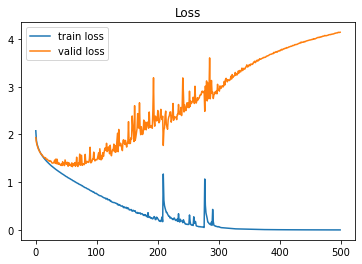

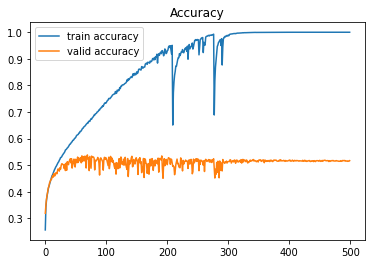

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()